# **Compute Sentiments Using Python Lexical, ML, DNN and Transformers**

By: Jon Chun
12 Jun 2021

References:

* Coming...

TODO:
* Demo datafiles
* Error detection around Crux points context (out of bounds)
* lex_discrete2continous (research binary->gaussian transformation fn)
* Text Preprocessing hints/tips/flowchart
* Clearly document workflow and partition across notebooks/libraries
* Code review and extraction to libraries
* Corpus ingestion for any format
* XAI (mlm false peak 1717SyuzhetR/1732SentimentR/1797robertalg15 adam watches war argument at dinner) 
* Centralize and Standardize Model name lists
* Normalize model SA Series lengths
* Standardize all SA Series with the same method
* Seamless report generation/file saving
* Get raw text from SentimentR
* Filter out non-printable characters
* Roll-over Crux-Points (SentNo+Sent/Parag) (plotly)
* Label/Roll-over Chapter/Sect No at Boundries
* Generate Report PDF/csv
* Option to select raw or discrete2continous transformation (Bing)
* Annotation functionality + Share/Collaboration of findings/reseearch
* clusters, centroids = kmeans1d.cluster(np.array(corpus_sentimentr_df['jockers_rinker']), k)
* plotly prefered library to save dynamic images: kaleido
* Correlation heatmaps: Justify choice of Spearman, Pearson, or other algo

Facts:
* SyuzhetR vs SentimentTime Clean/Preprocess
* V.Woolf - To The Lighthouse
* SyuzhetR Clean: 3511 (SyuzhetR Preprocessed) Sentences (SentimentTime Preprocessed) 3403
* SentimentTime Clean: (Raw) 3402  (Clean) 3402


Preprocessing of Corpus Textfile
* Put headers in ALL CAPS
* Put \n\n between each CHAPTER/BOOK or SECTION header or Paragraphs
* Keep your format/spacing consistent
* Try to use utf-8 (not cp1252 (e.g. \n <- \n\r)
* No leading blank lines, one trailing blank line at end of textfile
* Check for illegal, non-printable or other problematic code (e.g. curly single/double quotes)

# **Reference Code**

Surveys:
* https://github.com/prrao87/fine-grained-sentiment (20210409) Fine-grained SA (7 Models)


Other:
* https://github.com/annabiancajones/GA_capstone_project/blob/master/part3_mine_refine.ipynb
* https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 CV

In [ ]:
# Make sure using a GPU

# Tesla V100 = (3.0 x) P100 (2 vCPUs)
#       P100 = (1.6 x) K80  (2 vCPUs/12GB RAM)
#       P100 ~ T4 
#       K80  = (     ) NVIDA GeForce RTX 3080 Ti
#
# High RAM Colab Pro  32GB RAM     $9.99/mo
#          Colab Pro+ 52GB        $49.95/mo

# Paperspace Free & Paid JupyterLab vs Google Colab
# https://blog.paperspace.com/alternative-to-google-colab-pro/#:~:text=Most%20notable%20is%20that%20the,and%2012%20GB%20of%20RAM.&text=Meanwhile%2C%20in%20Paperspace%20Gradient%2C%20GPU,a%20Free%20or%20Paid%20instance. 
# https://www.kaggle.com/general/198232
# https://towardsdatascience.com/deep-learning-on-a-budget-450-egpu-vs-google-colab-494f9a2ff0db (3080 vs Colab)
# https://towardsdatascience.com/when-to-use-cpus-vs-gpus-vs-tpus-in-a-kaggle-competition-9af708a8c3eb (Kaggle Comp)
# https://towardsdatascience.com/google-colab-pro-is-it-worth-49-99-c542770b8e56 (Colab Pro+)
# https://www.quora.com/Which-is-better-Google-Colab-or-Kaggle-Notebook (Kaggle vs Colab GPUs)

!nvidia-smi

Wed Mar  2 03:22:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **[RESTART RUNTIME] May be Required for these Libaries**

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!pip install transformers

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.5 MB 5.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.5 MB 78.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67 kB 7.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 80.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 74.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# [RESTART RUNTIME] Required for T5 Transformer

!pip install sentencepiece

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.2 MB 5.1 MB/s 


In [ ]:
%%time

# NOTE: 

# Required by Transformer Models: All
import transformers
from transformers import pipeline

# Required by Transformer Models: Yelp, Hinglish
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Required by Transformer Models: IMDB50k
from transformers import AutoModelForSeq2SeqLM

# Required by Transforme Models: IMDB50k
from transformers import AutoModelWithLMHead

CPU times: user 21 ¬µs, sys: 0 ns, total: 21 ¬µs
Wall time: 24.1 ¬µs


In [ ]:
import sentencepiece

In [ ]:
# [RESTART RUNTIME] May be Required (only needed for Plotly)

# Designed Security Hole in older version of PyYAML, must upgrade to use plotly

# !pip install pyyaml==5.4.1

# [STEP 1] Manual Configuration

## [INPUT] Connect Google gDrive to this Jupyter Notebook

In [ ]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive')
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


In [ ]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.



# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/cdh/sentiment_arcs/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}

#@markdown (e.g. /gdrive/MyDrive/research/sentiment_arcs/)



# Step #2: Move to Parent directory of Sentiment_Arcs
# =======
parentdir_sentiment_arcs = '/'.join(Path_to_SentimentArcs.split('/')[:-2])
print(f'subdir_parent: {parentdir_sentiment_arcs}')
%cd $parentdir_sentiment_arcs


# Step #3: If project sentiment_arcs subdir does not exist, 
#          clone it from github
# =======
import os

if not os.path.isdir('sentiment_arcs'):
  # NOTE: This will not work until SentimentArcs becomes an open sourced PUBLIC repo
  # !git clone https://github.com/jon-chun/sentiment_arcs.git

  # Test on open access github repo
  !git clone https://github.com/jon-chun/nabokov_palefire.git


# Step #4: Change into sentiment_arcs subdir
# =======
%cd ./sentiment_arcs
# Test on open acess github repo
# %cd ./nabokov_palefire

# Step #5: Confirm contents of sentiment_arcs subdir
# =======
!ls 

subdir_parent: /gdrive/MyDrive/cdh
/gdrive/MyDrive/cdh
/gdrive/MyDrive/cdh/sentiment_arcs
 catboost_info				 learing_rate_0.01      sentiment_clean
 config					 learing_rate_0.7       sentiment_raw
 data					 lexicons	        sentinet.rda
 docs					 lmcd.rda	        sentiword.rda
 fastText-0.9.2				 loughranmcdonald.rda   SentiWord.rda
 get_sentimentr.R			 models__info.yaml      text_clean
 huliu.rda				 notebooks	        text_raw
'IMDB Dataset.csv'			 nrc.rda	        utils
 imdb-dataset-of-50k-movie-reviews.zip	 plots		        v0.9.2.zip
 jockersrinker.rda			 senticnet.rda	        v0.9.2.zip.1


## [INPUT] Define Directory Tree Structure

In [ ]:
#@markdown **Sentiment Arcs Directory Structure** \
#@markdown \
#@markdown **1. Input Directories:** \
#@markdown (a) Raw textfiles in subdir: ./text_raw/(text_type)/  \
#@markdown (b) Cleaned textfiles in subdir: ./text_clean/(text_type)/ \
#@markdown \
#@markdown **2. Output Directories** \
#@markdown (1) Raw Sentiment time series datafiles and plots in subdir: ./sentiment_raw/(text_type) \
#@markdown (2) Cleaned Sentiment time series datafiles and plots in subdir: ./sentiment_clean/(text_type) \
#@markdown \
#@markdown **Which type of texts are you analyzing?** \

Text_Type = "novels" #@param ["novels", "social_media", "finance"]

Corpus = "new_texts" #@param ["reference_corpora", "new_texts"]

#@markdown Please check that the required textfiles and datafiles exist in the correct subdirectories before continuing.


In [ ]:
!pwd

/gdrive/MyDrive/cdh/sentiment_arcs


In [ ]:
# Create Directory CONSTANTS based On Document Type

if Corpus == "new_texts":
  Corpus_Type = "new"
else:
  Corpus_Type = "ref"

# Project Subdirs
DIR_ROOT = Path_to_SentimentArcs
SUBDIR_TEXT_RAW = f"./text_raw/{Text_Type}_text_{Corpus_Type}_raw/"
SUBDIR_TEXT_CLEAN = f"./text_clean/{Text_Type}_text_{Corpus_Type}_clean/"
SUBDIR_SENTIMENT_RAW = f"./sentiment_raw/{Text_Type}_sentiment_{Corpus_Type}_raw/"
SUBDIR_SENTIMENT_CLEAN = f"./sentiment_clean/{Text_Type}_sentiment_{Corpus_Type}_clean/"
SUBDIR_PLOTS = f"./plots/"
SUBDIR_DATA = f"./data/"

# Destination filename to save raw sentiments 
FNAME_SENTIMENT_RAW = f'sentiment_raw_{Text_Type}_{Corpus_Type}_dnn2transformer.json'

# Verify Directory Structure

print('Verify the Directory Structure:\n')
print('-------------------------------\n')

print(f'           [Corpus Type]: {Text_Type}\n')
print(f'              [DIR_ROOT]: {DIR_ROOT}\n')
print(f'       [SUBDIR_TEXT_RAW]: {SUBDIR_TEXT_RAW}\n')
print(f'     [SUBDIR_TEXT_CLEAN]: {SUBDIR_TEXT_CLEAN}\n')
print(f'  [SUBDIR_SENTIMENT_RAW]: {SUBDIR_SENTIMENT_RAW}\n')
print(f'[SUBDIR_SENTIMENT_CLEAN]: {SUBDIR_SENTIMENT_CLEAN}\n')
print(f'          [SUBDIR_PLOTS]: {SUBDIR_PLOTS}\n')
print(f'           [SUBDIR_DATA]: {SUBDIR_DATA}\n')

print('\n\nVerify the Raw Sentiment Desitnation Datafile:\n')
print('----------------------------------------------\n')

print(f'   [FNAME_SENTIMENT_RAW]: {FNAME_SENTIMENT_RAW}\n')

Verify the Directory Structure:

-------------------------------

           [Corpus Type]: novels

              [DIR_ROOT]: /gdrive/MyDrive/cdh/sentiment_arcs/

       [SUBDIR_TEXT_RAW]: ./text_raw/novels_text_new_raw/

     [SUBDIR_TEXT_CLEAN]: ./text_clean/novels_text_new_clean/

  [SUBDIR_SENTIMENT_RAW]: ./sentiment_raw/novels_sentiment_new_raw/

[SUBDIR_SENTIMENT_CLEAN]: ./sentiment_clean/novels_sentiment_new_clean/

          [SUBDIR_PLOTS]: ./plots/

           [SUBDIR_DATA]: ./data/



Verify the Raw Sentiment Desitnation Datafile:

----------------------------------------------

   [FNAME_SENTIMENT_RAW]: sentiment_raw_novels_new_dnn2transformer.json



# **[STEP 2] Automatic Configuration**

## Configure Jupyter Notebook

In [ ]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

## Read YAML Configuration File

In [ ]:
!pip install pyyaml
import yaml

In [ ]:
# Read SentimentArcs YAML Config Files for Different Corpora Types(3) and Text Files Details

# Read SentimentArcs YAML Config Files on Models

# Model in SentimentArcs Ensemble
with open("./config/models_ref_info.yaml", "r") as stream:
  try:
    models_titles_dt = yaml.safe_load(stream)
  except yaml.YAMLError as exc:
    print(exc)

if Text_Type == 'novels':

  # Novel Text Files
  if Corpus == 'new_texts':
    # Corpus of New Novels
    with open("./config/novels_new_info.yaml", "r") as stream:
      try:
        corpus_titles_dt = yaml.safe_load(stream)
      except yaml.YAMLError as exc:
        print(exc)
  else:
    # Corpus of Reference Novels
    with open("./config/novels_ref_info.yaml", "r") as stream:
      try:
        corpus_titles_dt = yaml.safe_load(stream)
      except yaml.YAMLError as exc:
        print(exc)    

elif Text_Type == 'finance':

  # Finance Text Files
  if Corpus == 'new_texts':
    # Corpus of New Finance Texts
    with open("./config/finance_new_info.yaml", "r") as stream:
      try:
        corpus_titles_dt = yaml.safe_load(stream)
      except yaml.YAMLError as exc:
        print(exc)
  else:
    # Corpus of Reference Finance Texts
    with open("./config/finance_ref_info.yaml", "r") as stream:
      try:
        corpus_titles_dt = yaml.safe_load(stream)
      except yaml.YAMLError as exc:
        print(exc)

elif Text_Type == 'social_media':

  # Social Media Text Files
  if Corpus == 'new_texts':
    # Corpus of New Social Media Texts
    with open("./config/social_new_info.yaml", "r") as stream:
      try:
        corpus_titles_dt = yaml.safe_load(stream)
      except yaml.YAMLError as exc:
        print(exc)
  else:
    # Corpus of Reference Social Media Texts
    with open("./config/social_ref_info.yaml", "r") as stream:
      try:
        corpus_titles_dt = yaml.safe_load(stream)
      except yaml.YAMLError as exc:
        print(exc)

else:
  
  print(f"ERROR: Illegal Text_Type: {Text_Type}\n")

print(f'Corpus Titles Dictionary =')
corpus_titles_dt.keys()

print(f'\n\nThe Corpus Titles contains [{len(corpus_titles_dt.keys())} {Text_Type}] textfiles ')
print(f'\nFirst Text in Corpus:')
print(corpus_titles_dt[next(iter(corpus_titles_dt))])

Corpus Titles Dictionary =


dict_keys(['scollins_thehungergames1', 'cmieville_thecityandthecity'])



The Corpus Titles contains [2 novels] textfiles 

First Text in Corpus:
['The Hunger Games 1 by Suzanne Collins ', 2008, 0]


In [ ]:
import json

In [ ]:
# Verify the Corpora Text Titles

print(json.dumps(corpus_titles_dt, indent=2))

{
  "scollins_thehungergames1": [
    "The Hunger Games 1 by Suzanne Collins ",
    2008,
    0
  ],
  "cmieville_thecityandthecity": [
    "The City and The City by China Mieville",
    2009,
    0
  ]
}


In [ ]:
# Verfiy all 34 Sentiment Models in SentimentArcs Ensemble

print(json.dumps(models_titles_dt, sort_keys=True, indent=2))

{
  "AutoGluon_Text": [
    "autogluon",
    "tradml",
    "autogluon_text"
  ],
  "BERT_2IMDB": [
    "imdb2way",
    "transformer",
    "bert"
  ],
  "BERT_Dual_Coding": [
    "hinglish",
    "transformer",
    "bert"
  ],
  "BERT_Multilingual": [
    "nlptown",
    "transformer",
    "bert"
  ],
  "BERT_Yelp": [
    "yelp",
    "transformer",
    "bert"
  ],
  "CNN_DNN": [
    "cnn",
    "dnn",
    1315937
  ],
  "Distilled_BERT": [
    "huggingface",
    "transformer",
    "bert"
  ],
  "FLAML_AutoML": [
    "flaml",
    "tradml",
    "flaml"
  ],
  "Fully_Connected_Network": [
    "fcn",
    "dnn",
    6287671
  ],
  "HyperOpt_CNN_Flair_AutoML": [
    "flair",
    "dnn",
    0
  ],
  "LSTM_DNN": [
    "lstm",
    "dnn",
    7109089
  ],
  "Logistic_Regression": [
    "logreg",
    "tradml",
    "scikit"
  ],
  "Logistic_Regression_CV": [
    "logreg_cv",
    "tradml",
    "scikit"
  ],
  "Multilingual_CNN_Stanza_AutoML": [
    "stanza",
    "dnn",
    0
  ],
  "Multinomial_Naive_B

## Install Libraries: Python

In [ ]:
import numpy as np

from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('max_colwidth', 100) # -1)

In [ ]:
from glob import glob
import copy
import json

In [ ]:
# Plotly Visualizations

# import plotly.graph_objects as go
# import plotly.express as px
# import plotly

In [ ]:
# Scikit Utilities, Metrics, Pipelines and Models

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


## Setup Matplotlib Style

* https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [ ]:
from cycler import cycler

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']   
linestyles = ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--']

cycle = plt.cycler("color", colors) + plt.cycler("linestyle", linestyles)

# View previous matplotlib configuration
print('\n Old Matplotlib Configurtion Settings:\n')
# plt.rc.show
print('\n\n')

# Update and view new matplotlib configuration
print('\n New Matplotlib Configurtion Settings:\n')
myparams = {'axes.prop_cycle': cycle}
plt.rcParams.update(myparams)

plt.rcParams["axes.titlesize"] = 16
plt.rcParams['figure.figsize'] = 20,10
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["figure.titlesize"] = 32

# View matplotlib options
# plt.rcParams.keys()


 Old Matplotlib Configurtion Settings:





 New Matplotlib Configurtion Settings:



In [ ]:
"""
import matplotlib.colors as mcolors

mcolors.TABLEAU_COLORS

all_named_colors = {}
all_named_colors.update(mcolors.TABLEAU_COLORS)

print('\n')
all_named_colors.values()
""";

In [ ]:
# Set matplotlib plot figure.figsize

new_plt_size = plt.rcParams["figure.figsize"]=(20,10)

print(" New figure size: ",new_plt_size)

 New figure size:  (20, 10)


## Setup Seaborn Style

In [ ]:
# View previous seaborn configuration
print('\n Old Seaborn Configurtion Settings:\n')
sns.axes_style()
print('\n\n')

# Update and View new seaborn configuration
print('\n New Seaborn Configurtion Settings:\n')
# sns.set_style('white')
sns.set_context('paper')
sns.set_style('white')
sns.set_palette('tab10')

# Change defaults
# sns.set(style='white', context='talk', palette='tab10')


 Old Seaborn Configurtion Settings:



{'axes.axisbelow': 'line',
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'image.cmap': 'viridis',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}





 New Seaborn Configurtion Settings:



In [ ]:
# Seaborn: Set Theme (Scale of Font)

sns.set_theme('paper')  # paper, notebook, talk, poster


# Seaborn: Set Context
# sns.set_context("notebook")



# Seaborn: Set Style

# sns.set_style('ticks') # darkgrid, whitegrid, dark, white, and ticks

In [ ]:
# Seaborn: Default Palette (Pastel?)

sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [ ]:
# Seaborn: Set to High-Contrast Palette (more Vision Impaired Friendly)

sns.set_palette('tab10')
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn-whitegrid')

## Define Globals

In [ ]:
# Main Dictionary holding all Lexicon by Name/Key

lexicons_dt = {}


# Test WORDS of Sentiment Analysis
test_words_ls =["Love",
                "Hate",
                "bizarre",
                "strange",
                "furious",
                "elated",
                "curious",
                "beserk",
                "gambaro"]


# Test SENTENCES of Sentiment Analysis
test_sentences_ls =["I hate bad evil worthless Mondays.",
                    "I love Paris in the springtime",
                    "It was Wednesday.",
                    "You are a disgusting pig - I hate you.",
                    "What a delightfully funny and beautiful good man.",
                    "That was it"]

## Python Utility Functions

In [ ]:
# NOTE: SentimentArcs Main datastructure is a Dictionary(Corpus) of DataFrames(Documents: rows=sentences, cols=sentiment, 1 col per model in ensemble)
#       This complex data structure has 2 special I/O utility functions to read/write to permanent disk storage as *.json files

# Utility functions to read/write nested Dictionary (key=novel) of DataFrames (Cols = Model Sentiment Series) 

def write_dict_dfs(adict, out_file='sentiments.json', out_dir=SUBDIR_SENTIMENT_RAW):
  '''
  Given a Dictionary of DataFrames and optional output filename and output directory
  Write as nested json file
  '''

  # convert dataframes into dictionaries
  data_dict = {
      key: adict[key].to_dict(orient='records') 
      for key in adict.keys()
  }

  # write to disk
  out_fullpath = f'{out_dir}{out_file}'
  print(f'Saving file to: {out_fullpath}')
  with open(out_fullpath, 'w') as fp:
    json.dump(
      data_dict, 
      fp, 
      indent=4, 
      sort_keys=True
    )

  return 

def read_dict_dfs(in_file='sentiments.json', in_dir=SUBDIR_SENTIMENT_RAW):
  '''
  Given a Dictionary of DataFrames and optional output filename and output directory
  Read nested json file into Dictionary of DataFrames
  '''

  # read from disk
  in_fullpath = f'{in_dir}{in_file}'
  with open(in_fullpath, 'r') as fp:
      data_dict = json.load(fp)

  # convert dictionaries into dataframes
  all_dt = {
      key: pd.DataFrame(data_dict[key]) 
      for key in data_dict
  }

  return all_dt

# **[STEP 3] Read Clean Corpus Texts and any Existing Raw Sentiment Data**

In [ ]:
print(f'Trying to find EXISTING Raw Sentiment Datafile:\n  [{FNAME_SENTIMENT_RAW}]\n  in Raw Sentiment Subdir: {SUBDIR_SENTIMENT_RAW}\n')

corpus_texts_dt = {}
subdir_sentiment_raw_ls = os.listdir(SUBDIR_SENTIMENT_RAW)

if FNAME_SENTIMENT_RAW not in subdir_sentiment_raw_ls:
  # No Existing Raw Sentiment Data, Just read in Clean Text
  print(f'No EXISTING Raw Sentiment Datafile exists, Start from Stratch...\n')

  # Create a List (preprocessed_ls) of all preprocessed text files
  try:
    preprocessed_ls = glob(f'{SUBDIR_TEXT_CLEAN}*.csv')
    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]
    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]
  except IndexError:
    raise RuntimeError('No csv file found')

  # Read all preprocessed text files into master DataFrame (corpus_dt)
  for i,anovel in enumerate(preprocessed_ls):
    print(f'Processing #{i}: {anovel}...')
    afile_fullpath = f'{SUBDIR_TEXT_CLEAN}{anovel}.csv'
    print(f'               {afile_fullpath}')
    anovel_df = pd.read_csv(afile_fullpath, index_col=[0])
    corpus_texts_dt[anovel] = anovel_df

  print('\n'.join(preprocessed_ls))
  print('\n')
  print(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')
else:
  # Found Existing Raw Sentiment Data with Clean Text, Read Both
  print(f'Found EXISTING  Raw Sentiment Datafile exists, Loading...\n')
  corpus_texts_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
  print(f'The  Models have Analyzed these Texts in the Corpus:\n\n  {corpus_texts_dt.keys()}\n\n')    

# Verify Corpus DataFrame
corpus_titles_ls = list(corpus_texts_dt.keys())
# corpus_texts_dt[corpus_titles_ls[0]].head()
corpus_texts_dt[corpus_titles_ls[0]].info()

Trying to find EXISTING Raw Sentiment Datafile:
  [sentiment_raw_novels_new_dnn2transformer.json]
  in Raw Sentiment Subdir: ./sentiment_raw/novels_sentiment_new_raw/

Found EXISTING  Raw Sentiment Datafile exists, Loading...

The  Models have Analyzed these Texts in the Corpus:

  dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hinglish         10125 non-null  int64  
 1   huggingface      10125 non-null  float64
 2   imdb2way         10125 non-null  int64  
 3   nlptown          10125 non-null  float64
 4   roberta15lg      10125 non-null  float64
 5   robertaxml8lang  10125 non-null  float64
 6   text_clean       10125 non-null  object 
 7   text_raw         10125 non-null  object 
 8   yelp             10125 non-null  int64  
dtypes: float64(4), int64(3), 

# **[STEP 4] DNN Models**

In [ ]:
# Get global list of Corpus Titles/Keys into Dictionary corpus_texts_dt

corpus_titles_ls = list(corpus_texts_dt.keys())
corpus_titles_ls

['cmieville_thecityandthecity', 'scollins_thehungergames1']

## **Model Utilities**

In [ ]:
# https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook

def metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

In [ ]:
def lexicon_metrics(y, y_pred):
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

## Prepare IMDB Training Dataset

* https://github.com/lazuxd/simple-imdb-sentiment-analysis/blob/master/sentiment-analysis.ipynb

In [ ]:
# Import Libraries

import re
from os import listdir
from os.path import isfile, join
from random import shuffle

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
# Utility Functions

def create_data_frame(folder: str) -> pd.DataFrame:
    '''
    folder - the root folder of train or test dataset
    Returns: a DataFrame with the combined data from the input folder
    '''
    pos_folder = f'{folder}/pos' # positive reviews
    neg_folder = f'{folder}/neg' # negative reviews
    
    def get_files(fld: str) -> list:
        '''
        fld - positive or negative reviews folder
        Returns: a list with all files in input folder
        '''
        return [join(fld, f) for f in listdir(fld) if isfile(join(fld, f))]
    
    def append_files_data(data_list: list, files: list, label: int) -> None:
        '''
        Appends to 'data_list' tuples of form (file content, label)
        for each file in 'files' input list
        '''
        for file_path in files:
            with open(file_path, 'r') as f:
                text = f.read()
                data_list.append((text, label))
    
    pos_files = get_files(pos_folder)
    neg_files = get_files(neg_folder)
    
    data_list = []
    append_files_data(data_list, pos_files, 1)
    append_files_data(data_list, neg_files, 0)
    shuffle(data_list)
    
    text, label = tuple(zip(*data_list))
    # replacing line breaks with spaces
    text = list(map(lambda txt: re.sub('(<br\s*/?>)+', ' ', txt), text))
    
    return pd.DataFrame({'text': text, 'label': label})


def train_and_show_scores(X: csr_matrix, y: np.array, title: str) -> None:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.75, stratify=y
    )

    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)
    print(f'{title}\nTrain score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')


    

In [ ]:
%%time

# NOTE:  8m57s @01:07 on 20220102 Colab Pro

# Get Dataset

# Verify in SentimentArcs Data Subdirectory

os.chdir(f'{DIR_ROOT}{SUBDIR_DATA}')
!pwd
print('\n')

!wget "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
!tar -xzf "aclImdb_v1.tar.gz"
print('\n')

!ls -altr

/gdrive/MyDrive/cdh/sentiment_arcs/data
--2022-03-02 05:53:58--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‚ÄòaclImdb_v1.tar.gz‚Äô

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.1MB/s    in 4.0s    

2022-03-02 05:54:02 (19.9 MB/s) - ‚ÄòaclImdb_v1.tar.gz‚Äô saved [84125825/84125825]

total 173150
drwx------ 4 root root     4096 Jun 26  2011  aclImdb
-rw------- 1 root root 84125825 Jun 26  2011  aclImdb_v1.tar.gz
-rw------- 1 root root 66212309 Oct 19  2019 'IMDB Dataset.csv'
-rw------- 1 root root 26962657 Mar  1 01:30  imdb-dataset-of-50k-movie-reviews.zip


In [ ]:
%%time

# NOTE:   0m59s @01:08 on 20220302 Colab Pro

imdb_train_df = create_data_frame('aclImdb/train')
imdb_test_df = create_data_frame('aclImdb/test')

!mkdir 'csv'
imdb_train_df.to_csv('csv/imdb_train.csv', index=False)
imdb_test_df.to_csv('csv/imdb_test.csv', index=False)

# imdb_train = pd.read_csv('csv/imdb_train.csv')
# imdb_test = pd.read_csv('csv/imdb_test.csv')

In [ ]:
!pwd
!ls -altr

/gdrive/MyDrive/cdh/sentiment_arcs/data
total 173154
drwx------ 4 root root     4096 Jun 26  2011  aclImdb
-rw------- 1 root root 84125825 Jun 26  2011  aclImdb_v1.tar.gz
-rw------- 1 root root 66212309 Oct 19  2019 'IMDB Dataset.csv'
-rw------- 1 root root 26962657 Mar  1 01:30  imdb-dataset-of-50k-movie-reviews.zip
drwx------ 2 root root     4096 Mar  2 06:08  csv


In [ ]:
!mkdir 'imdb50k_data_preprocessors'
!mkdir 'imdb50k_vectorized_data'

In [ ]:
%%time

# NOTE:  0m58s @01:14 on 20220302 Colab Pro

# Choose Representation Format (a)-(d) by Best SGDClassifer Performance

# Option (a): Unigram Counts

unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))
unigram_vectorizer.fit(imdb_train['text'].values)

dump(unigram_vectorizer, 'imdb50k_data_preprocessors/unigram_vectorizer.joblib')

# unigram_vectorizer = load('imdb50k_data_preprocessors/unigram_vectorizer.joblib')

X_train_unigram = unigram_vectorizer.transform(imdb_train['text'].values)

save_npz('imdb50k_vectorized_data/X_train_unigram.npz', X_train_unigram)

# X_train_unigram = load_npz('imdb50k_vectorized_data/X_train_unigram.npz')


# Option (b): Unigram TF-IDF

unigram_tf_idf_transformer = TfidfTransformer()
unigram_tf_idf_transformer.fit(X_train_unigram)

dump(unigram_tf_idf_transformer, 'imdb50k_data_preprocessors/unigram_tf_idf_transformer.joblib')

# unigram_tf_idf_transformer = load('imdb50k_data_preprocessors/unigram_tf_idf_transformer.joblib')

X_train_unigram_tf_idf = unigram_tf_idf_transformer.transform(X_train_unigram)

save_npz('imdb50k_vectorized_data/X_train_unigram_tf_idf.npz', X_train_unigram_tf_idf)

# X_train_unigram_tf_idf = load_npz('imdb50k_vectorized_data/X_train_unigram_tf_idf.npz')


# Option (c): Bigram Counts

bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))
bigram_vectorizer.fit(imdb_train['text'].values)

dump(bigram_vectorizer, 'imdb50k_data_preprocessors/bigram_vectorizer.joblib')

# bigram_vectorizer = load('imdb50k_data_preprocessors/bigram_vectorizer.joblib')

X_train_bigram = bigram_vectorizer.transform(imdb_train['text'].values)

save_npz('imdb50k_vectorized_data/X_train_bigram.npz', X_train_bigram)

# X_train_bigram = load_npz('imdb50k_vectorized_data/X_train_bigram.npz')


# Option (d): Bigram TF-IDF

bigram_tf_idf_transformer = TfidfTransformer()
bigram_tf_idf_transformer.fit(X_train_bigram)

dump(bigram_tf_idf_transformer, 'imdb50k_data_preprocessors/bigram_tf_idf_transformer.joblib')

# bigram_tf_idf_transformer = load('imdb50k_data_preprocessors/bigram_tf_idf_transformer.joblib')

X_train_bigram_tf_idf = bigram_tf_idf_transformer.transform(X_train_bigram)

save_npz('imdb50k_vectorized_data/X_train_bigram_tf_idf.npz', X_train_bigram_tf_idf)

# X_train_bigram_tf_idf = load_npz('imdb50k_vectorized_data/X_train_bigram_tf_idf.npz')

y_train = imdb_train['label'].values

train_and_show_scores(X_train_unigram, y_train, 'Unigram Counts')
print('\n')
train_and_show_scores(X_train_unigram_tf_idf, y_train, 'Unigram Tf-Idf')
train_and_show_scores(X_train_bigram, y_train, 'Bigram Counts')
train_and_show_scores(X_train_bigram_tf_idf, y_train, 'Bigram Tf-Idf')

CountVectorizer()

['imdb50k_data_preprocessors/unigram_vectorizer.joblib']

TfidfTransformer()

['imdb50k_data_preprocessors/unigram_tf_idf_transformer.joblib']

CountVectorizer(ngram_range=(1, 2))

['imdb50k_data_preprocessors/bigram_vectorizer.joblib']

TfidfTransformer()

['imdb50k_data_preprocessors/bigram_tf_idf_transformer.joblib']

Unigram Counts
Train score: 1.0 ; Validation score: 0.87

Unigram Tf-Idf
Train score: 0.95 ; Validation score: 0.89

Bigram Counts
Train score: 1.0 ; Validation score: 0.87

Bigram Tf-Idf
Train score: 0.98 ; Validation score: 0.9



In [ ]:
%%time

# NOTE:   7m19s @01:19 on 20220302 Colab Pro

# Choose Hyperparameters using Cross-Validation
# Phase 1: loss, learning rate and initial learning rate

X_train = X_train_bigram_tf_idf

clf = SGDClassifier()

distributions = dict(
    loss=['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    learning_rate=['optimal', 'invscaling', 'adaptive'],
    eta0=uniform(loc=1e-7, scale=1e-2)
)

random_search_cv = RandomizedSearchCV(
    estimator=clf,
    param_distributions=distributions,
    cv=5,
    n_iter=50,
    verbose=10
)
random_search_cv.fit(X_train, y_train)
print(f'Best params: {random_search_cv.best_params_}')
print(f'Best score: {random_search_cv.best_score_}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START eta0=0.0005398170401278795, learning_rate=invscaling, loss=perceptron
[CV 1/5; 1/50] END eta0=0.0005398170401278795, learning_rate=invscaling, loss=perceptron;, score=0.854 total time=   0.4s
[CV 2/5; 1/50] START eta0=0.0005398170401278795, learning_rate=invscaling, loss=perceptron
[CV 2/5; 1/50] END eta0=0.0005398170401278795, learning_rate=invscaling, loss=perceptron;, score=0.848 total time=   0.3s
[CV 3/5; 1/50] START eta0=0.0005398170401278795, learning_rate=invscaling, loss=perceptron
[CV 3/5; 1/50] END eta0=0.0005398170401278795, learning_rate=invscaling, loss=perceptron;, score=0.857 total time=   0.3s
[CV 4/5; 1/50] START eta0=0.0005398170401278795, learning_rate=invscaling, loss=perceptron
[CV 4/5; 1/50] END eta0=0.0005398170401278795, learning_rate=invscaling, loss=perceptron;, score=0.853 total time=   0.3s
[CV 5/5; 1/50] START eta0=0.0005398170401278795, learning_rate=invscaling, loss=percep

In [ ]:
%%time

# NOTE:   7m19s @01:26 on 20220302 Colab Pro

# Choose Hyperparameters using Cross-Validation
# Phase 2: penalty and alpha

clf = SGDClassifier()

distributions = dict(
    penalty=['l1', 'l2', 'elasticnet'],
    alpha=uniform(loc=1e-6, scale=1e-4)
)

random_search_cv = RandomizedSearchCV(
    estimator=clf,
    param_distributions=distributions,
    cv=5,
    n_iter=50,
    verbose=5
)
random_search_cv.fit(X_train, y_train)
print(f'Best params: {random_search_cv.best_params_}')
print(f'Best score: {random_search_cv.best_score_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END alpha=6.092466760800829e-06, penalty=l2;, score=0.910 total time=   0.4s
[CV 2/5] END alpha=6.092466760800829e-06, penalty=l2;, score=0.898 total time=   0.5s
[CV 3/5] END alpha=6.092466760800829e-06, penalty=l2;, score=0.911 total time=   0.5s
[CV 4/5] END alpha=6.092466760800829e-06, penalty=l2;, score=0.904 total time=   0.5s
[CV 5/5] END alpha=6.092466760800829e-06, penalty=l2;, score=0.905 total time=   0.5s
[CV 1/5] END alpha=4.807769400481698e-05, penalty=l1;, score=0.879 total time=   1.3s
[CV 2/5] END alpha=4.807769400481698e-05, penalty=l1;, score=0.877 total time=   1.4s
[CV 3/5] END alpha=4.807769400481698e-05, penalty=l1;, score=0.883 total time=   1.3s
[CV 4/5] END alpha=4.807769400481698e-05, penalty=l1;, score=0.880 total time=   1.4s
[CV 5/5] END alpha=4.807769400481698e-05, penalty=l1;, score=0.883 total time=   1.3s
[CV 1/5] END alpha=8.647091164501203e-05, penalty=l1;, score=0.861 total time=

In [ ]:
# Save Best Hyperparmaters for SGDClassifier 

!mkdir 'imdb50k_classifiers'

sgd_classifier = random_search_cv.best_estimator_

dump(random_search_cv.best_estimator_, 'imdb50k_classifiers/sgd_classifier.joblib')

# sgd_classifier = load('classifiers/sgd_classifier.joblib')

['classifiers/sgd_classifier.joblib']

In [ ]:
# Testing Best Model

X_test = bigram_vectorizer.transform(imdb_test['text'].values)
X_test = bigram_tf_idf_transformer.transform(X_test)
y_test = imdb_test['label'].values

score = sgd_classifier.score(X_test, y_test)
print(score)

## **Deep Neural Networks**

* https://github.com/thoailinh/Sentiment-Analysis-using-BERT (Viet Comparison)

* https://github.com/Feuoy/sentiment-analysis (Chinese Comparison)

* https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook#CNN-Model
* https://github.com/bentrevett/pytorch-sentiment-analysis

* https://github.com/nileshsah/deep-text-classifier/blob/master/inshorts_notebook.ipynb
* https://github.com/saurabhrathor/InceptionModel_SentimentAnalysis (fasttext emb CNN+LSTM) BB_twtr SemEval2017
* https://github.com/kaliahinartem/twitter_sentiment_analysis
* https://github.com/leelaylay/TweetSemEval


### **Common Setup**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.wrappers.scikit_learn import KerasClassifier

from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
training_df.info()

In [ ]:
# Split labeled dataset into training, validation and test sets
# e.g. for IMDB 50k reviews: Out of 50k dataset, 36k for training, 4k for Validationa and 10k for testing

X_train, X_test, y_train, y_test = train_test_split(training_df['text_raw'], training_df['polarity'],test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

[x.shape for x in [X_train,X_valid,X_test]]


In [ ]:
X_train.shape
print('\n')
type(X_train)

In [ ]:
type(X_train)

In [ ]:
X_train[:2]

In [ ]:
%%time

# Tokenize text

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(training_df.text_raw)

X_train1 = tokenizer.texts_to_sequences(X_train)
X_valid1 = tokenizer.texts_to_sequences(X_valid)
X_test1 = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])
print(X_train1[2])

In [ ]:
type(X_train1)
print('\n')
X_train1

In [ ]:
corpus_sents_df.head()

In [ ]:
corpus_sents_df['sent_clean'] = corpus_sents_df['sent_clean'].astype('string')
X_corpus_ser = corpus_sents_df['sent_clean']
type(X_corpus_ser)
X_corpus_ser[:2]

In [ ]:
X_corpus1 = tokenizer.texts_to_sequences(X_corpus_ser)
type(X_corpus1)
X_corpus_ser[4]
X_corpus1[4]

In [ ]:
"""
X_corpus = np.asarray(tokenizer.texts_to_sequences(X_corpus_ser)) # , dtype=int)
X_corpus.shape
type(X_corpus)
X_corpus
""";

In [ ]:
"""
X_corpus = np.array(tokenizer.texts_to_sequences(corpus_sents_df['sent_clean'])) # , dtype=int)
X_corpus.shape
type(X_corpus)
X_corpus
""";

In [ ]:
"""
tokens_ls_ls = tokenizer.texts_to_sequences(corpus_sents_df['sent_clean'])
X_corpus_ar = np.array([np.array(lsi) for lsi in tokens_ls_ls])
X_corpus_ar
""";

In [ ]:
"""
X_corpus = np.asarray(tokenizer.texts_to_sequences(corpus_sents_df['sent_clean'])) # , dtype=int)
# X_corpus = X_corpus.astype('int32')
# npa = np.asarray(someListOfLists, dtype=np.float32)
X_corpus[:3]
print('\n')
type(X_corpus)
""";

In [ ]:
print(X_train[2])

In [ ]:
seq_lens = [len(s) for s in X_train1]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

In [ ]:
seq_lens = [len(s) for s in X_corpus1]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

In [ ]:
# Set max sequence and pad where necessary

maxlen = 150

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_valid1 = pad_sequences(X_valid1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

print(X_train1[2, :])

In [ ]:
X_corpus1 = pad_sequences(X_corpus1, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

### **Fully Connected Networks (FCN)**

In [ ]:
# Build the Network

embedding_dim = 50
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

In [ ]:
%%time

# Train the Network

history = model.fit(X_train1, y_train,epochs=10,verbose=True,validation_data=(X_valid1, y_valid),batch_size=1000,callbacks=[callback])

In [ ]:
y_test1_pred = model.predict(X_test1)
y_test1_pred

In [ ]:
y_test1_pred.size

In [ ]:
y_test1_pred_bin = np.where(y_test1_pred > 0.5, 1, 0)
y_test1_pred_bin = y_test1_pred_bin.squeeze()

In [ ]:
type(y_test1_pred_bin[0])

In [ ]:
y_test

In [ ]:
y_test_fl = y_test.apply(lambda x: float(x))
y_test_fl

In [ ]:
y_test_ar = np.array(y_test_fl, dtype=np.float32)
type(y_test_ar)
print('\n')
y_test_ar.shape
print('\n')
y_test_ar

In [ ]:
type(y_test1_pred)
print('\n')
y_test1_pred = y_test1_pred.squeeze()
y_test1_pred.shape
print('\n')
y_test1_pred

In [ ]:
accuracy_score(y_test, y_test1_pred_bin)

In [ ]:
plot_history(history)

In [ ]:
plt.figure(figsize=(4,4))
# sns.heatmap(confusion_matrix(y_test, model.predict(X_test1)),annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
sns.heatmap(confusion_matrix(y_test, y_test1_pred_bin),annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actual",fontsize=16)
plt.show();

In [ ]:
y_corpus1_pred = model.predict(X_corpus1)
type(y_corpus1_pred)
print('\n')
print(y_corpus1_pred)

In [ ]:
fcn_ar = y_corpus1_pred.squeeze()
fcn_ar.shape

In [ ]:
corpus_sents_df['fcn'] = pd.Series(fcn_ar)

In [ ]:
# corpus_sents_df['fcn'].apply(lambda x: 6*(x-0.3)).rolling(900, center=True).mean().plot(label='Fully Connected Neural Net')
corpus_sents_df['fcn'].apply(lambda x: 8*(x-0.55)).rolling(900, center=True).mean().plot(label='Fully Connected Neural Net')
corpus_sents_df['sentimentr_stdscaler'].rolling(900, center=True).mean().plot(label='SentimentR')
corpus_sents_df['vader_stdscaler'].rolling(900, center=True).mean().plot(label='VADER')
plt.legend(loc='best');
plt.title(f'{CORPUS_FULL}\nFully Connected Neural Net (Default w/IMDB) SMA=10%');

### **RNN**

### **LSTM**

**Ref: https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert#4.-Predictive-Modelling-using-Machine-Learning**

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig , ax = plt.subplots(1,2,figsize = (10,5))
  
  ax[0].plot(epochRange,history.history['accuracy'],label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend()
  ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Loss')
  ax[1].legend()
  fig.tight_layout()
  plt.show()



In [ ]:
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

In [ ]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test =  tokenizer.texts_to_sequences(X_test)

In [ ]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

In [ ]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

In [ ]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

In [ ]:
#create padded sequences
pad_train=pad_sequences(seq_train,truncating = 'post', padding = 'pre',maxlen=max_seq_len)
pad_test=pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [ ]:
#Splitting training set for validation purposes
Xtrain,Xval,ytrain,yval=train_test_split(pad_train,y_train, test_size=0.2,random_state=10)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [ ]:
def lstm_model(Xtrain,Xval,ytrain,yval,V,D,maxlen,epochs):

    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32,5,activation = 'relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128,return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()

    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
#     #early_stop = EarlyStopping(monitor='val_accuracy', 
#                                mode='min', 
#                                patience = 2 )
#     #checkpoints= ModelCheckpoint(filepath='./',
#                             monitor="val_accuracy",
#                             verbose=0,
#                             save_best_only=True
#                            )
  #  callbacks = [checkpoints,early_stop]
    r = model.fit(Xtrain,ytrain, 
                  validation_data = (Xval,yval), 
                  epochs = epochs, 
                  verbose = 2,
                  batch_size = 32)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(Xtrain,ytrain))
    print("Validation score:", model.evaluate(Xval,yval))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

In [ ]:
%%time

# NOTE: 3m51s

D = 64 #embedding dims
epochs = 5
r,model,n_epochs = lstm_model(Xtrain,Xval,ytrain,yval,V,D,max_seq_len,epochs)

In [ ]:
#Plot accuracy and loss

plotLearningCurve(r,n_epochs)

In [ ]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(pad_test,y_test)
print(dict(zip(model.metrics_names, result)))

In [ ]:
#Generate predictions for the test dataset
ypred = model.predict(pad_test)
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
X_corpus_ser = corpus_sents_df['sent_clean']
type(X_corpus_ser)
X_corpus_ser[:5]

In [ ]:
type(X_corpus)

In [ ]:
##create sequences of reviews
seq_corpus = tokenizer.texts_to_sequences(X_corpus_ser)
# seq_test =  tokenizer.texts_to_sequences(X_test)

In [ ]:
type(seq_corpus)

In [ ]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_corpus]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

In [ ]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

In [ ]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

In [ ]:
max_seq_len

In [ ]:
#create padded sequences
pad_corpus=pad_sequences(seq_corpus,truncating = 'post', padding = 'pre',maxlen=584) # max_seq_len)
# pad_test=pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [ ]:
#Generate predictions for the corpus dataset
y_corpus_pred = model.predict(pad_corpus)
y_corpus_pred.shape
y_corpus_pred

In [ ]:
lstm_ar = y_corpus_pred.squeeze()
lstm_ar.shape

In [ ]:
corpus_sents_df['lstm'] = pd.Series(lstm_ar)

In [ ]:
corpus_sents_df['fcn'].apply(lambda x: 8*(x-0.55)).rolling(900, center=True).mean().plot(label='Fully Connected Neural Net')
corpus_sents_df['lstm'].apply(lambda x: 5*(x-0.47)).rolling(900, center=True).mean().plot(label='LSTM Neural Net')
corpus_sents_df['sentimentr_stdscaler'].rolling(900, center=True).mean().plot(label='SentimentR')
corpus_sents_df['vader_stdscaler'].rolling(900, center=True).mean().plot(label='VADER')
plt.legend(loc='best');
plt.title(f'{CORPUS_FULL}\nLSTM Neural Net (Default w/IMDB) SMA=10%');

In [ ]:
corpus_root_filename

In [ ]:
corpus_sents_df.to_csv(f'sum_4andDNN_{corpus_root_filename}.csv')

**Ref: https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook#CNN-Model**

In [ ]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict(X_test1))

In [ ]:
history.history

In [ ]:
plot_history(history)

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test1)),annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actual",fontsize=16)
plt.show()

### **CNN**

* https://github.com/bentrevett/pytorch-sentiment-analysis (CNN w/GLoVE and IMDB)

* https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

In [ ]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
%%time

# NOTE: 

model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict_classes(X_test1))

In [ ]:
plot_history(history)

### **BERT**

In [ ]:
# https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert#5.-Predictive-Modelling-using-Deep-Learning

#Perform tokenization
# automatically download the vocab used during pretraining or fine-tuning a given model,use from_pretrained() method
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
#pass our texts to the tokenizer

Xtrain_enc = tokenizer(Xtrain.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object
Xval_enc = tokenizer(Xval.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object
Xtest_enc = tokenizer(Xtest.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object

In [ ]:
#preparing our datasets

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtrain_enc),
    ytrain
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xval_enc),
    yval
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtest_enc),
    ytest
))

In [ ]:
def bert_model(train_dataset,val_dataset,transformer,max_len,epochs):
    print("----Building the model----")
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = 'attention_mask') #attention mask
    sequence_output = transformer(input_ids,attention_mask)[0]
    cls_token = sequence_output[:, 0, :]
    x = Dense(512, activation='relu')(cls_token)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids,attention_mask], outputs=y)
    model.summary()
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    r = model.fit(train_dataset.batch(32),batch_size = 32,
                  validation_data = val_dataset.batch(32),epochs = epochs)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(train_dataset.batch(32)))
    print("Validation score:", model.evaluate(val_dataset.batch(32)))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

In [ ]:
transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

In [ ]:
epochs = 2
max_len = max_seq_len
r,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)

In [ ]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

In [ ]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(test_dataset.batch(32))
print(dict(zip(model.metrics_names, result)))

In [ ]:
#Generate predictions for the test dataset
ypred = model.predict(test_dataset.batch(32))
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## AutoML

### AutoKeras

* https://autokeras.com/tutorial/text_classification/

In [ ]:
# RESTART RUNTIME

!pip install autokeras

In [ ]:
import os

import numpy as np
import tensorflow as tf
from sklearn.datasets import load_files

import autokeras as ak

In [ ]:
dataset = tf.keras.utils.get_file(
    fname="aclImdb.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True,
)

# set path to dataset
IMDB_DATADIR = os.path.join(os.path.dirname(dataset), "aclImdb")

classes = ["pos", "neg"]
train_data = load_files(
    os.path.join(IMDB_DATADIR, "train"), shuffle=True, categories=classes
)
test_data = load_files(
    os.path.join(IMDB_DATADIR, "test"), shuffle=False, categories=classes
)

x_train = np.array(train_data.data)
y_train = np.array(train_data.target)
x_test = np.array(test_data.data)
y_test = np.array(test_data.target)

print(x_train.shape)  # (25000,)
print(y_train.shape)  # (25000, 1)
print(x_train[0][:50])  # this film was just brilliant casting

In [ ]:
# Initialize the text classifier.
clf = ak.TextClassifier(
    overwrite=True, max_trials=1
)  # It only tries 1 model as a quick demo.

# Feed the text classifier with training data.
clf.fit(x_train, y_train, epochs=2)

# Predict with the best model.
predicted_y = clf.predict(x_test)

# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

In [ ]:
clf.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
)

In [ ]:
"""
split = 5000
x_val = x_train[split:]
y_val = y_train[split:]
x_train = x_train[:split]
y_train = y_train[:split]

clf.fit(
    x_train,
    y_train,
    epochs=2,
    # Use your own validation set.
    validation_data=(x_val, y_val),
)
""";

In [ ]:
input_node = ak.TextInput()
output_node = ak.TextBlock(block_type="ngram")(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=1
)
clf.fit(x_train, y_train, epochs=2)

### Pytorch-Optimize

* https://github.com/jettify/pytorch-optimizer (20210705 2k)

### Keras-Tuner

* https://github.com/keras-team/keras-tuner

## Transformers


# **[STEP 5] Transformer Models**

* https://github.com/patil-suraj/exploring-T5/blob/master/t5_fine_tuning.ipynb


## Transformer Utilities

In [ ]:
def labelscore2fl(labelscore_sentiment_ls, sa_model):
  '''
  Given the list of dict returned by RoBERTa15lg
  Return a floating point value for sentiment
  '''
  sentiment_fl = -99.99

  label_str = labelscore_sentiment_ls[0]['label'].strip().lower()
  score_fl = float(labelscore_sentiment_ls[0]['score'])

  # For lablels POSTIVE/POS, NEGATIVE/NEG
  if label_str in ['positive','pos']:
    sentiment_fl = score_fl
  elif label_str in ['negative','neg']:
    sentiment_fl = -1.0 * (score_fl)
  elif label_str in ['neutral','neu']:
    sentiment_fl = 0

  # For Labels 'n Stars' where n=[1..5]
  elif label_str == '1 star':
    sentiment_fl = score_fl
  elif label_str == '2 stars':
    sentiment_fl = 1.0 + score_fl
  elif label_str == '3 stars':
    sentiment_fl = 2.0 + score_fl
  elif label_str == '4 stars':
    sentiment_fl = 3.0 + score_fl
  elif label_str == '5 stars':
    sentiment_fl = 4.0 + score_fl

  # Else ERROR on illegal Label value
  else:
    print(f'ERROR: Illegal value for RoBERTa Label: {label_str}')

  return sentiment_fl

"""
# Test Words
print(f'Testing for WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(test_words_ls):

  word_sentiment_fl = labelscore2fl(sa_model(aword_str))
  # print(f'Word: {aword_str}')
  print(f'[{word_sentiment_fl:^8.3f}]: {aword_str}\n')


# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(test_sentences_ls):

  sent_sentiment_fl = labelscore2fl(sa_model(asent_str))
  # print(f'Sentence: {asent_str}')
  print(f'[{sent_sentiment_fl:^8.3f}]: {asent_str}\n')
""";

In [ ]:
def logitstensor2sentiment(hugseqclass_output):
  '''
  Given a Huggingface SequenceClassifierOutput logits tensor
  Return Sentiment and assoc softmax probability values
  '''

  text_smax_ls_ls = hugseqclass_output.logits.softmax(dim=-1).tolist()
  text_smax_ls = text_smax_ls_ls[0]
  # print(type(text_smax_ls[0]))
  # print(f'  sMAX: {text_smax_ls}')
  max_val = max(text_smax_ls)            # Probability based upon logits %
  max_indx = text_smax_ls.index(max_val) # Sentiment (starting from 0 up)
  val_scale = len(text_smax_ls)
  # print(f'   MAX: {max_val} at indx={max_indx}')

  return max_indx, val_scale, max_val

"""
# Test
text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_yelp(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'SENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')
""";

## **RoBERTa Large 15 Datasets (5 cats)**

* https://huggingface.co/siebert/sentiment-roberta-large-english
* https://huggingface.co/roberta-base 

In [ ]:
%%time

# NOTE: 00m11s @12:39 on 20220301 Colab Pro 

sa_model = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
print(sa_model("I love this!"))

In [ ]:
# Define Model and Test

model_title = 'RoBERTa Large 15DB'
model_name = 'roberta15lg'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(test_words_ls):

  word_sentiment_fl = sa_model(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(test_sentences_ls):

  sent_sentiment_fl = sa_model(asent_str)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl}\n')

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

In [ ]:
%%time

# NOTE:   ~40m00s @12:39 on 20220301 Colab Pro P100 (1 Novels)
#       ~1h31m00s @12:39 on 20220301 Colab Pro P100 (2 Novels)

# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: labelscore2fl(sa_model(x)))

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 1
text_title_str = corpus_titles_ls[novel_indx]

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {model_title}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
# Save sentiment values to subdir_sentiments
save_filename = f'sentiment_raw_{Corpus_Type}_{Text_Type}_dnn2transformer.json'
write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Text_Type: {Text_Type}')
print(f'     Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=save_filename, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[novels_titles_ls[0]].info()


## **Huggingface Distill BERT SST**

* https://www.machinecurve.com/index.php/2020/12/23/easy-sentiment-analysis-with-machine-learning-and-huggingface-transformers/

* https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english 

In [ ]:
# BUG: Cannot reuse variable name 'sa_model', causes replicated results of first model declared (e.g. roberta15lg)
# sa_model = pipeline("sentiment-analysis")

# Huggingface default sentiment classifier model:
#   distilbert-base-uncased-finetuned-sst-2-english
classifier = pipeline("sentiment-analysis")

In [ ]:
classifier("We are very happy to show you the ü§ó Transformers library.")
# sa_model("I love this")

In [ ]:
# Define Model and Test

model_title = 'Huggingface DistilBERT'
model_name = 'huggingface'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(test_words_ls):

  word_sentiment_fl = classifier(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(test_sentences_ls):

  sent_sentiment_fl = labelscore2fl(classifier(asent_str), sa_model=classifier)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl}\n')

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

In [ ]:
%%time

# NOTE:   ~10m59s @?? on 20220301 Colab Pro P100 (2 Novels)

# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: labelscore2fl(classifier(x), sa_model=classifier))

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 1
text_title_str = corpus_titles_ls[novel_indx]

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {model_title}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
# Save sentiment values to subdir_sentiments
# save_filename = f'sentiment_raw_{Corpus_Type}_{Text_Type}_dnn2transformer.json'
write_dict_dfs(corpus_texts_dt, out_file=FNAME_SENTIMENT_RAW, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Text_Type: {Text_Type}')
print(f'     Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[novels_titles_ls[0]].info()


## **NLPTown Multilingual BERT (5 cats)**

* https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

In [ ]:
# NLPTown: Multilingual trained BERT Model

sa_nlptown = pipeline("sentiment-analysis",model="nlptown/bert-base-multilingual-uncased-sentiment")

# Test
print(sa_nlptown("I love this!"))

In [ ]:
# Define Model and Test

model_title = 'NLPTown MultiBERT'
model_name = 'nlptown'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(test_words_ls):

  word_sentiment_fl = sa_nlptown(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(test_sentences_ls):

  sent_sentiment_fl = labelscore2fl(sa_nlptown(asent_str), sa_model=sa_nlptown)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl:.3f}\n')

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

In [ ]:
%%time

# NOTE:   9m05s @16:40 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity)
#         ~8m07s @16:49 on 20220201 Colab Pro P100 (1 Novel: scollins_thehungergames1)

# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: labelscore2fl(sa_nlptown(x), sa_model=sa_nlptown))

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 1
text_title_str = corpus_titles_ls[novel_indx]

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {model_title}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
# Save sentiment values to subdir_sentiments
# save_filename = f'sentiment_raw_{Corpus_Type}_{Text_Type}_dnn2transformer.json'
write_dict_dfs(corpus_texts_dt, out_file=FNAME_SENTIMENT_RAW, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Text_Type: {Text_Type}')
print(f'     Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[novels_titles_ls[0]].info()


## **Yelp Finetuned BERT (5 cats)**

* https://huggingface.co/gilf/english-yelp-sentiment

In [ ]:
# Yelp Trained BERT Sentiment Classifier

# from transformers import AutoTokenizer, AutoModelForSequenceClassification (above)
tokenizer = AutoTokenizer.from_pretrained("gilf/english-yelp-sentiment")

sa_yelp = AutoModelForSequenceClassification.from_pretrained("gilf/english-yelp-sentiment")

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_yelp(**text_enc)
print(f'Yelp SA Model:\n  INPUT: {text_str}\n  SENTIMENT: {text_sentiment}')
print(f'  TYPE: {type(text_sentiment)}')
text_smax_ls_ls = text_sentiment.logits.softmax(dim=-1).tolist()
text_smax_ls = text_smax_ls_ls[0]
print(type(text_smax_ls[0]))
print(f'  sMAX: {text_smax_ls}')
max_val = max(text_smax_ls)
max_indx = text_smax_ls.index(max_val)
print(f'   MAX: {max_val} at indx={max_indx}')

In [ ]:
"""
def logitstensor2sentiment(hugseqclass_output):
  '''
  Given a Huggingface SequenceClassifierOutput logits tensor
  Return Sentiment and assoc softmax probability values
  '''

  text_smax_ls_ls = hugseqclass_output.logits.softmax(dim=-1).tolist()
  text_smax_ls = text_smax_ls_ls[0]
  # print(type(text_smax_ls[0]))
  # print(f'  sMAX: {text_smax_ls}')
  max_val = max(text_smax_ls)            # Probability based upon logits %
  max_indx = text_smax_ls.index(max_val) # Sentiment (starting from 0 up)
  val_scale = len(text_smax_ls)
  # print(f'   MAX: {max_val} at indx={max_indx}')

  return max_indx, val_scale, max_val
""";

# Test
text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_yelp(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'SENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')

In [ ]:
# Define Model and Test

model_title = 'Yelp BERT'
model_name = 'yelp'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(test_words_ls):

  aword_enc = tokenizer(aword_str, return_tensors='pt')
  logits_tensor = sa_yelp(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(test_sentences_ls):

  asent_enc = tokenizer(asent_str, return_tensors='pt')
  logits_tensor = sa_yelp(**asent_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Sentence: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

sent_test_str = "I hate Mondays and bad doctors."
print(f"Sentence: {sent_test_str}\n {logitstensor2sentiment(sa_hinglish(**tokenizer(sent_test_str, return_tensors='pt')))[0]}")

In [ ]:
%%time

# NOTE:    10m45s @17:39 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#          10m19s @17:48 on 20220301 Colab Pro P100 (1 Novel: scollins_thehungergames1: 9.0k sentences)

# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 1
text_title_str = corpus_titles_ls[novel_indx]

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {model_title}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
# Save sentiment values to subdir_sentiments
# save_filename = f'sentiment_raw_{Corpus_Type}_{Text_Type}_dnn2transformer.json'
write_dict_dfs(corpus_texts_dt, out_file=FNAME_SENTIMENT_RAW, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Text_Type: {Text_Type}')
print(f'     Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[novels_titles_ls[0]].info()


## **Hinglish Mixed Code BERT (3 cats)**

* https://huggingface.co/rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment

In [ ]:
# Hindi-English Code Switching BERT Model

# from transformers import AutoTokenizer, AutoModelForSequenceClassification (above)
tokenizer = AutoTokenizer.from_pretrained("rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment")

sa_hinglish = AutoModelForSequenceClassification.from_pretrained("rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment")

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_hinglish(**text_enc)
print(f'Hinglish SA Model:\n  INPUT: {text_str}\n  SENTIMENT: {text_sentiment}')
print(f'  TYPE: {type(text_sentiment)}')
text_smax_ls_ls = text_sentiment.logits.softmax(dim=-1).tolist()
text_smax_ls = text_smax_ls_ls[0]
print(type(text_smax_ls[0]))
print(f'  sMAX: {text_smax_ls}')
max_val = max(text_smax_ls)
max_indx = text_smax_ls.index(max_val)
print(f'   MAX: {max_val} at indx={max_indx}')

In [ ]:
"""
def logitstensor2sentiment(hugseqclass_output):
  '''
  Given a Huggingface SequenceClassifierOutput logits tensor
  Return Sentiment and assoc softmax probability values
  '''

  text_smax_ls_ls = hugseqclass_output.logits.softmax(dim=-1).tolist()
  text_smax_ls = text_smax_ls_ls[0]
  # print(type(text_smax_ls[0]))
  # print(f'  sMAX: {text_smax_ls}')
  max_val = max(text_smax_ls)            # Probability based upon logits %
  max_indx = text_smax_ls.index(max_val) # Sentiment (starting from 0 up)
  val_scale = len(text_smax_ls)
  # print(f'   MAX: {max_val} at indx={max_indx}')

  return max_indx, val_scale, max_val
""";

# Test
text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_hinglish(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'SENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')

In [ ]:
# Define Model and Test

model_title = 'Hinglish Dual Code BERT'
model_name = 'hinglish'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(test_words_ls):

  aword_enc = tokenizer(aword_str, return_tensors='pt')
  logits_tensor = sa_hinglish(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(test_sentences_ls):

  asent_enc = tokenizer(asent_str, return_tensors='pt')
  logits_tensor = sa_hinglish(**asent_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Sentence: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

sent_test_str = "I hate Mondays and bad doctors."
print(f"Sentence: {sent_test_str}\n {logitstensor2sentiment(sa_hinglish(**tokenizer(sent_test_str, return_tensors='pt')))[0]}")

In [ ]:
%%time

# NOTE:    8m06s @17:39 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#         10m00s @17:48 on 20220301 Colab Pro P100 (1 Novel: scollins_thehungergames1: 9.0k sentences)

# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: logitstensor2sentiment(sa_hinglish(**tokenizer(x, return_tensors='pt')))[0])

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 1
text_title_str = corpus_titles_ls[novel_indx]

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {model_title}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
# Save sentiment values to subdir_sentiments
# save_filename = f'sentiment_raw_{Corpus_Type}_{Text_Type}_dnn2transformer.json'
write_dict_dfs(corpus_texts_dt, out_file=FNAME_SENTIMENT_RAW, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Text_Type: {Text_Type}')
print(f'     Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[novels_titles_ls[0]].info()


## **BERT IMDB Sentiment (2 cats)**

* https://huggingface.co/abhishek/autonlp-imdb_sentiment_classification-31154 (metrics)

In [ ]:
# BERT Sentiment Classifier fine-tuned on IMDB

# from transformers import AutoTokenizer, AutoModelForSequenceClassification (above)
tokenizer = AutoTokenizer.from_pretrained("abhishek/autonlp-imdb_sentiment_classification-31154")

sa_imdb = AutoModelForSequenceClassification.from_pretrained("abhishek/autonlp-imdb_sentiment_classification-31154")

In [ ]:
# sentiment_analysis = pipeline("sentiment-analysis",model="abhishek/autonlp-imdb_sentiment_classification-31154")

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_imdb(**text_enc)
print(f'IMDB SA Model:\n  INPUT: {text_str}\n  SENTIMENT: {text_sentiment}')
print(f'  TYPE: {type(text_sentiment)}')
text_smax_ls_ls = text_sentiment.logits.softmax(dim=-1).tolist()
text_smax_ls = text_smax_ls_ls[0]
print(type(text_smax_ls[0]))
print(f'  sMAX: {text_smax_ls}')
max_val = max(text_smax_ls)
max_indx = text_smax_ls.index(max_val)
print(f'   MAX: {max_val} at indx={max_indx}')

In [ ]:
"""
def logitstensor2sentiment(hugseqclass_output):
  '''
  Given a Huggingface SequenceClassifierOutput logits tensor
  Return Sentiment and assoc softmax probability values
  '''

  text_smax_ls_ls = hugseqclass_output.logits.softmax(dim=-1).tolist()
  text_smax_ls = text_smax_ls_ls[0]
  # print(type(text_smax_ls[0]))
  # print(f'  sMAX: {text_smax_ls}')
  max_val = max(text_smax_ls)            # Probability based upon logits %
  max_indx = text_smax_ls.index(max_val) # Sentiment (starting from 0 up)
  val_scale = len(text_smax_ls)
  # print(f'   MAX: {max_val} at indx={max_indx}')

  return max_indx, val_scale, max_val
""";

# Test
text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_imdb(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'SENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')

In [ ]:
# Define Model and Test

model_title = 'IMDB BERT'
model_name = 'imdb2way'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(test_words_ls):
  
  aword_enc = tokenizer(aword_str, return_tensors='pt')
  logits_tensor = sa_imdb(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(test_sentences_ls):

  asent_enc = tokenizer(asent_str, return_tensors='pt')
  logits_tensor = sa_imdb(**asent_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Sentence: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

Testing WORD Sentiment
--------------------------------------------------


NameError: ignored

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

sent_test_str = "I hate Mondays and bad doctors."
print(f"Sentence: {sent_test_str}\n {logitstensor2sentiment(sa_imdb(**tokenizer(sent_test_str, return_tensors='pt')))[0]}")

In [ ]:
%%time

# NOTE:     4m32s @18:10 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#           4m08s @18:15 on 20220301 Colab Pro P100 (1 Novel: scollins_thehungergames1: 9.0k sentences)

# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: logitstensor2sentiment(sa_imdb(**tokenizer(x, return_tensors='pt')))[0])

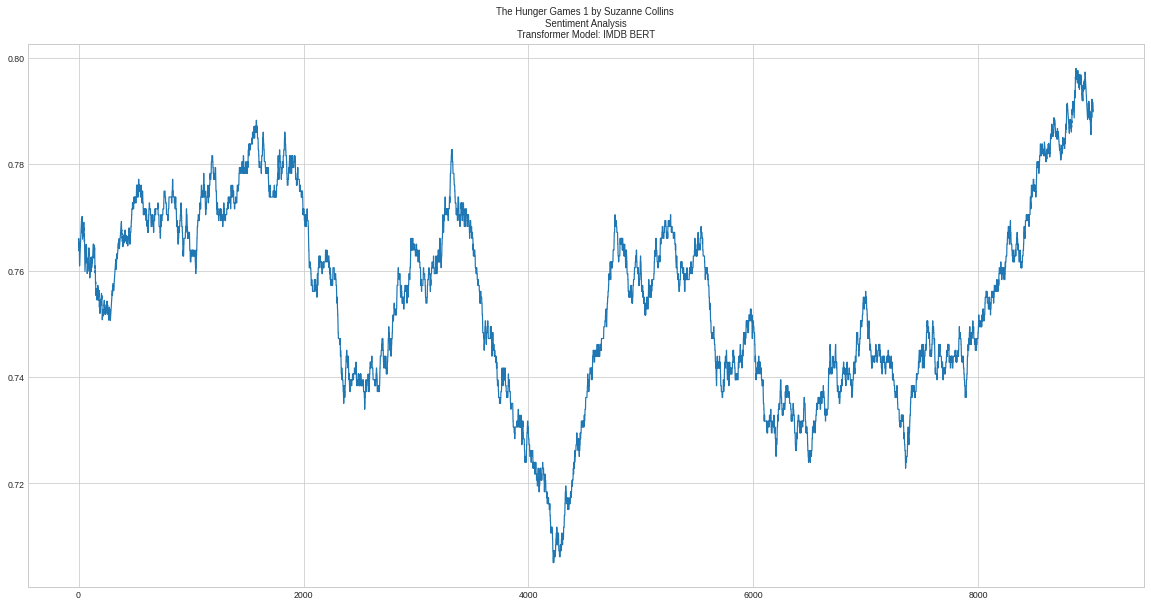

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 1
text_title_str = corpus_titles_ls[novel_indx]

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {model_title}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

In [ ]:
# Save sentiment values to subdir_sentiments
# save_filename = f'sentiment_raw_{Corpus_Type}_{Text_Type}_dnn2transformer.json'
write_dict_dfs(corpus_texts_dt, out_file=FNAME_SENTIMENT_RAW, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Text_Type: {Text_Type}')
print(f'     Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[novels_titles_ls[0]].info()


## **T5Base 50k Finetuned IMDB Sentiment Extraction (2 cats)**

* https://huggingface.co/mrm8488/t5-small-finetuned-imdb-sentiment 
* https://github.com/patil-suraj/exploring-T5/blob/master/t5_fine_tuning.ipynb

In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-small-finetuned-imdb-sentiment")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-small-finetuned-imdb-sentiment")

def sa_t5imdb50k(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model.generate(input_ids=input_ids,
               max_length=2)
  
  dec = [tokenizer.decode(ids) for ids in output]
  label = dec[0]
  return label
  
sa_t5imdb50k("I dislike a lot that film")

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

'<pad> negative'

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
res = sa_t5imdb50k(text_str)
type(res)
print(f'res: [{res}]')


str

res: [<pad> positive]


In [ ]:
def t5str2sentiment(t5_str):
  '''
  Given a T5 text string with sentiment and tags
  Return a -1,0,1 for negative,neutral/OOV,positive sentiment
  '''

  t5_sentiment1_str = t5_str.replace('<pad>','')
  t5_sentiment2_str = t5_sentiment1_str.replace('</s>','')
  t5_core_str = t5_sentiment2_str.strip().lower()
  # print(f't5_sentiment_raw_str: {t5_sentiment_raw_str}')
  # print(f't5_sentiment_str: {t5_sentiment_str}')
  # print(f't5_core_str: {t5_core_str}')
  if t5_core_str == 'positive':
    t5_sentiment_fl = 1
  elif t5_core_str == 'negative':
    t5_sentiment_fl = -1
  elif len(t5_core_str) > 0:
    # Out of Vocab (OOV) Word
    t5_sentiment_fl = 0
  elif len(t5_core_str) == 0:
    # Empty String
    t5_sentiment_fl = 0
  else:
    print(f'ERROR: Illegal value ts_sentiment_str: {t5_sentiment_str}')

  return int(t5_sentiment_fl)

# Test
asent_str = "I love the good and kind-hearted lovely lady who give me tasty cookies."
t5_response_str = sa_t5imdb50k(asent_str)
asentiment_int = t5str2sentiment(t5_response_str)
print(f'STRING: {asent_str}\nSENTIMENT: {asentiment_int}')

STRING: I love the good and kind-hearted lovely lady who give me tasty cookies.
SENTIMENT: 1


In [ ]:
# Define Model and Test

model_title = 'T5 Base IMDB50K'
model_name = 't5imdb50k'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(test_words_ls):

  t5_sentiment_raw_str = t5str2sentiment(sa_t5imdb50k(aword_str))
  print(f'Word: {aword_str}\n    Sentiment: {t5_sentiment_raw_str}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(test_sentences_ls):

  t5_sentiment_raw_str = t5str2sentiment(sa_t5imdb50k(asent_str))
  print(f'Word: {asent_str}\n    Sentiment: {t5_sentiment_raw_str}\n')

Testing WORD Sentiment
--------------------------------------------------
Word: Love
    Sentiment: 1

Word: Hate
    Sentiment: -1

Word: bizarre
    Sentiment: 0

Word: strange
    Sentiment: -1

Word: furious
    Sentiment: 0

Word: elated
    Sentiment: -1

Word: curious
    Sentiment: 1

Word: beserk
    Sentiment: -1

Word: gambaro
    Sentiment: -1


Testing SENTENCE Sentiment
--------------------------------------------------
Word: I hate bad evil worthless Mondays.
    Sentiment: -1

Word: I love Paris in the springtime
    Sentiment: 1

Word: It was Wednesday.
    Sentiment: 1

Word: You are a disgusting pig - I hate you.
    Sentiment: -1

Word: What a delightfully funny and beautiful good man.
    Sentiment: 1

Word: That was it
    Sentiment: 0



In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}\n')

sent_test_str = "I hate Mondays and bad doctors."
# sent_test_str = "You are a disgusting pig - I hate you."
print(f"SENTENCE: {sent_test_str}\nSENTIMENT: {t5str2sentiment(sa_t5imdb50k(sent_test_str))}")

Saving results to Model: t5imdb50k

SENTENCE: I hate Mondays and bad doctors.
SENTIMENT: -1


In [ ]:
%%time

# NOTE:    10m45s @17:39 on 20220301 Colab Pro (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#          10m00s @17:48 on 20220301 Colab Pro (1 Novel: scollins_thehungergames1: 9.0k sentences)

# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: t5str2sentiment(sa_t5imdb50k(x)))

Processing #0: cmieville_thecityandthecity


  0%|          | 0/10125 [00:00<?, ?it/s]

Processing #1: scollins_thehungergames1


  0%|          | 0/9021 [00:00<?, ?it/s]

CPU times: user 17min 37s, sys: 9.48 s, total: 17min 47s
Wall time: 8min 52s


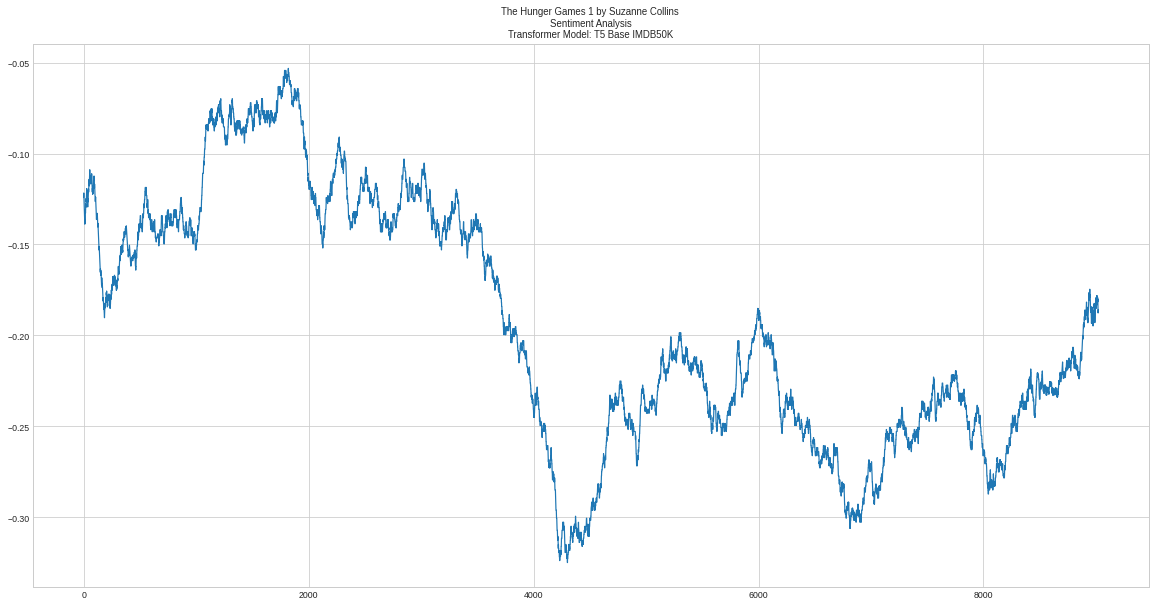

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 1
text_title_str = corpus_titles_ls[novel_indx]

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {model_title}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

/gdrive/MyDrive/cdh/sentiment_arcs


In [ ]:
# Save sentiment values to subdir_sentiments
# save_filename = f'sentiment_raw_{Corpus_Type}_{Text_Type}_dnn2transformer.json'
write_dict_dfs(corpus_texts_dt, out_file=FNAME_SENTIMENT_RAW, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Text_Type: {Text_Type}')
print(f'     Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[novels_titles_ls[0]].info()


Saving file to: ./sentiment_raw/novels_sentiment_new_raw/sentiment_raw_novels_new_dnn2transformer.json
Saving Text_Type: novels
     Corpus_Type: new


These Text Titles:


dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])

hinglish  huggingface  ...  yelp  t5imdb50k
0         0    -0.936181  ...     2          1
1         0     0.739575  ...     1         -1
2         2     0.970969  ...     4         -1
3         2     0.998701  ...     2          1
4         2     0.998341  ...     4          1

[5 rows x 10 columns]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hinglish         10125 non-null  int64  
 1   huggingface      10125 non-null  float64
 2   imdb2way         10125 non-null  int64  
 3   nlptown          10125 non-null  float64
 4   roberta15lg      10125 non-null  float64
 5   robertaxml8lang  10125 non-null  float64
 6   t5imdb50k        10125 non-null  int64  
 7   text_clean       10125 non-null  object 
 8   text_raw         10125 non-null  object 
 9   yelp             10125 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 791.1+ KB


## **RoBERTa XLM Twitter 8 Multilingual (3 cats, slow)**

* http://huggingface.co/cardiffnlp/twitter-xlm-roberta-base-sentiment

In [ ]:
# !pip install sentencepiece

In [ ]:
# RoBERTa XLM Fine-tuend on 8 Multilingual Tweets

model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sa_robertaxml8lang = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

# Test
sa_robertaxml8lang("T'estimo!")

[{'label': 'Positive', 'score': 0.6600582599639893}]

In [ ]:
# Define Model and Test

model_title = 'RoBERTa XLM Twitter 8Lang'
model_name = 'robertaxml8lang'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(test_words_ls):

  word_sentiment_fl = sa_robertaxml8lang(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(test_sentences_ls):

  sent_sentiment_fl = labelscore2fl(sa_robertaxml8lang(asent_str), sa_model=sa_robertaxml8lang)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl:.3f}\n')

Testing WORD Sentiment
--------------------------------------------------
Word: Love
    [{'label': 'Positive', 'score': 0.39642244577407837}]

Word: Hate
    [{'label': 'Negative', 'score': 0.5858045816421509}]

Word: bizarre
    [{'label': 'Negative', 'score': 0.4368371367454529}]

Word: strange
    [{'label': 'Negative', 'score': 0.3701768219470978}]

Word: furious
    [{'label': 'Negative', 'score': 0.42496591806411743}]

Word: elated
    [{'label': 'Neutral', 'score': 0.38555991649627686}]

Word: curious
    [{'label': 'Neutral', 'score': 0.49868252873420715}]

Word: beserk
    [{'label': 'Negative', 'score': 0.36750832200050354}]

Word: gambaro
    [{'label': 'Neutral', 'score': 0.3720065653324127}]


Testing SENTENCE Sentiment
--------------------------------------------------
Sentence: I hate bad evil worthless Mondays.
    -0.955

Sentence: I love Paris in the springtime
    0.846

Sentence: It was Wednesday.
    0.000

Sentence: You are a disgusting pig - I hate you.
    -0.9

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

Saving results to Model: robertaxml8lang


In [ ]:
%%time

# NOTE:   9m05s @16:40 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity)
#         ~8m07s @16:49 on 20220201 Colab Pro P100 (1 Novel: scollins_thehungergames1)

# Compute Sentiments based upon SentimentR Lexicon

for i, atext in enumerate(corpus_texts_dt.keys()):
  print(f"Processing #{i}: {atext}")

  corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].progress_apply(lambda x: labelscore2fl(sa_robertaxml8lang(x), sa_model=sa_robertaxml8lang))

Processing #0: cmieville_thecityandthecity


  0%|          | 0/10125 [00:00<?, ?it/s]

Processing #1: scollins_thehungergames1


  0%|          | 0/9021 [00:00<?, ?it/s]

CPU times: user 33min 28s, sys: 11.5 s, total: 33min 40s
Wall time: 16min 50s


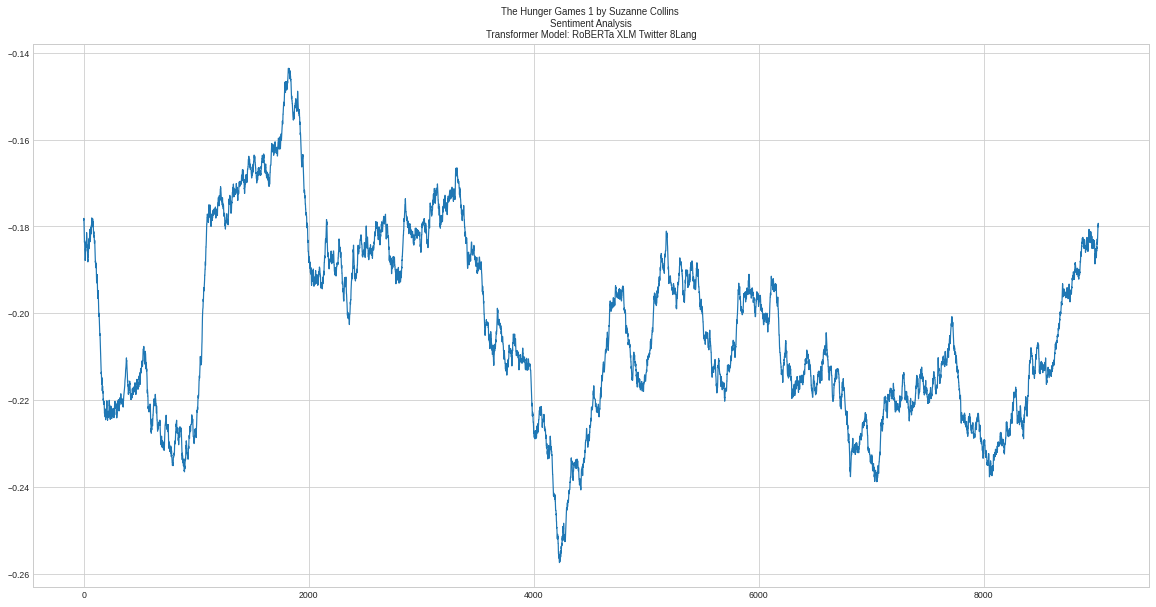

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 1
text_title_str = corpus_titles_ls[novel_indx]

win_10per = int(0.10*corpus_texts_dt[text_title_str].shape[0])
plot_title_str = f"{corpus_titles_dt[text_title_str][0]}\nSentiment Analysis\n{model_type} Model: {model_title}"
corpus_texts_dt[text_title_str][model_name].rolling(win_10per, center=True, min_periods=0).mean().plot(title=plot_title_str)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory

os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

/gdrive/MyDrive/cdh/sentiment_arcs


In [ ]:
# Save sentiment values to subdir_sentiments
# save_filename = f'sentiment_raw_{Corpus_Type}_{Text_Type}_dnn2transformer.json'
write_dict_dfs(corpus_texts_dt, out_file=FNAME_SENTIMENT_RAW, out_dir=SUBDIR_SENTIMENT_RAW)
print(f'Saving Text_Type: {Text_Type}')
print(f'     Corpus_Type: {Corpus_Type}')
print('\n')

# Verify Dictionary was saved correctly by reading back the *.json datafile
test_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
print(f'These Text Titles:')
test_dt.keys()
print('\n')

corpus_texts_dt[corpus_titles_ls[0]].head()
print('\n')

test_dt[novels_titles_ls[0]].info()

Saving file to: ./sentiment_raw/novels_sentiment_new_raw/sentiment_raw_novels_new_dnn2transformer.json
Saving Text_Type: novels
     Corpus_Type: new


These Text Titles:


dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])

hinglish  huggingface  ...  yelp  robertaxml8lang
0         0    -0.936181  ...     2         0.000000
1         0     0.739575  ...     1        -0.660563
2         2     0.970969  ...     4        -0.537102
3         2     0.998701  ...     2         0.417663
4         2     0.998341  ...     4         0.427551

[5 rows x 9 columns]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hinglish         10125 non-null  int64  
 1   huggingface      10125 non-null  float64
 2   imdb2way         10125 non-null  int64  
 3   nlptown          10125 non-null  float64
 4   roberta15lg      10125 non-null  float64
 5   robertaxml8lang  10125 non-null  float64
 6   text_clean       10125 non-null  object 
 7   text_raw         10125 non-null  object 
 8   yelp             10125 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 712.0+ KB


In [ ]:
corpus_texts_dt[corpus_titles_ls[0]].info()

NameError: ignored

# **END OF NOTEBOOK**